# Set up

In [56]:
#load the files into an array
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Assignment/CS156/Clothing_images

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Assignment/CS156/Clothing_images


In [57]:
!pip install python-resize-image


In [58]:
!pip install tensorflow

In [59]:
from sklearn.model_selection import train_test_split
from glob import glob
from PIL import Image
from resizeimage import resizeimage
import numpy as np
from skimage.io import imread_collection
import matplotlib.pyplot as plt
#import sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from tqdm import tqdm 

#import tensorflow
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

In [60]:
# create paths for all images
man_images = glob('man_200/*')[:500]
woman_images = glob('woman_200/*')[:500]
#store the collection
man_collect = imread_collection(man_images)
woman_collect = imread_collection(woman_images)


def data_processing(images, collections, new_height = 224, new_width = 224): 
    resize = []
    flattened = []
    # for each image path
    for path in tqdm(images):
        # open it as a read file in binary mode
        with open(path, 'r+b') as f:
            # open it as an image
            with Image.open(f) as image:
                width, height = image.size
                if (width >= 224) and (height >= 224):
                  # resize the image to be more manageable
                  cover = resizeimage.resize_cover(image, [new_width, new_height])
                  resize.append(cover)
                  # flatten the matrix to an array and append it to all flattened images
                  flattened.append(np.array(cover).flatten())            

    # Change datatype to an array
    X = np.asarray(flattened)
    return resize, flattened, X

man_resize, man_flattened, X_man = data_processing(man_images, man_collect)
woman_resize, woman_flattened, X_woman = data_processing(woman_images, woman_collect)

100%|██████████| 500/500 [00:41<00:00, 12.12it/s]


In data processing, we reduce the images into 100*70 pixels, and reshape them into a flattened array. 

In [61]:
print(f'There are {len(man_collect)} men images, and {len(woman_collect)} women images.' )

There are 500 men images, and 500 women images.


# Plot photos

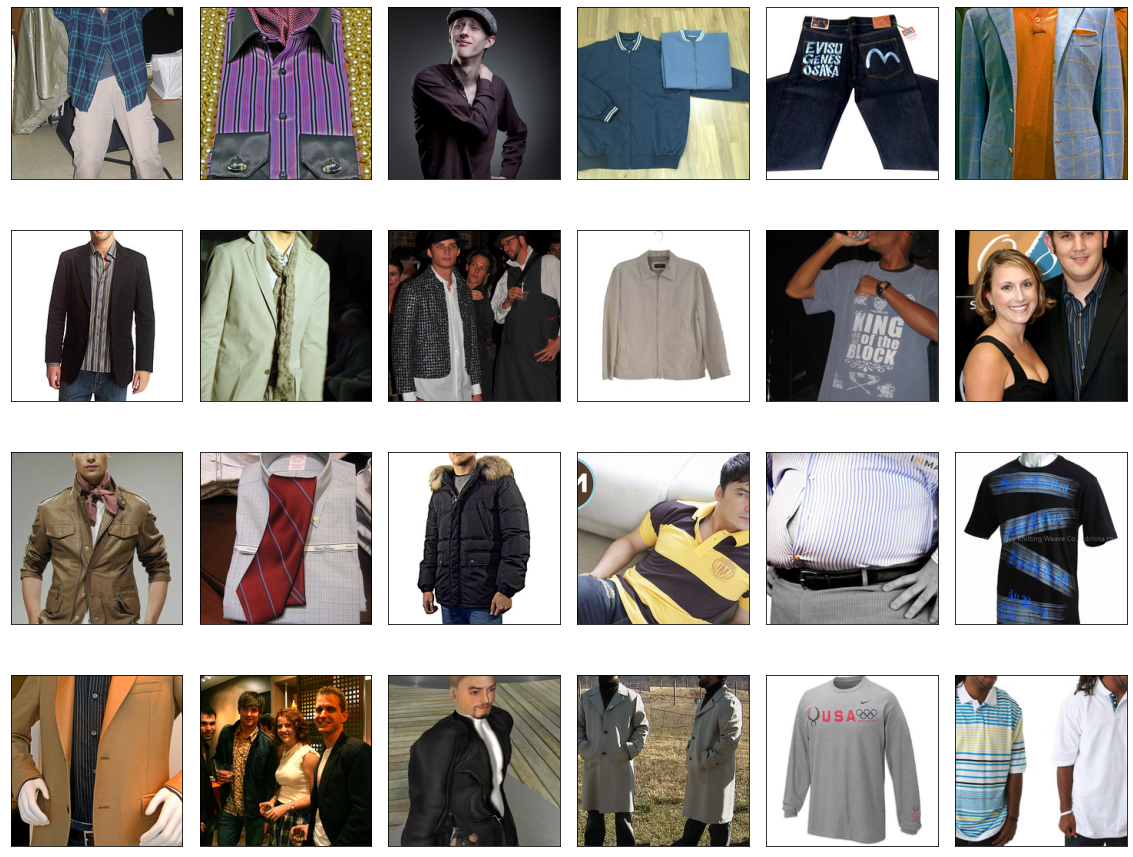

In [62]:
#plot the photos 
def original_photos(photos_resize):
    fig, ax = plt.subplots(4, 6, figsize=(20, 16),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))

    k = 0
    for i in range(4):
        for j in range(6):
            ax[i, j].imshow(photos_resize[k])
            k += 1
            
    plt.show()
original_photos(man_resize)          

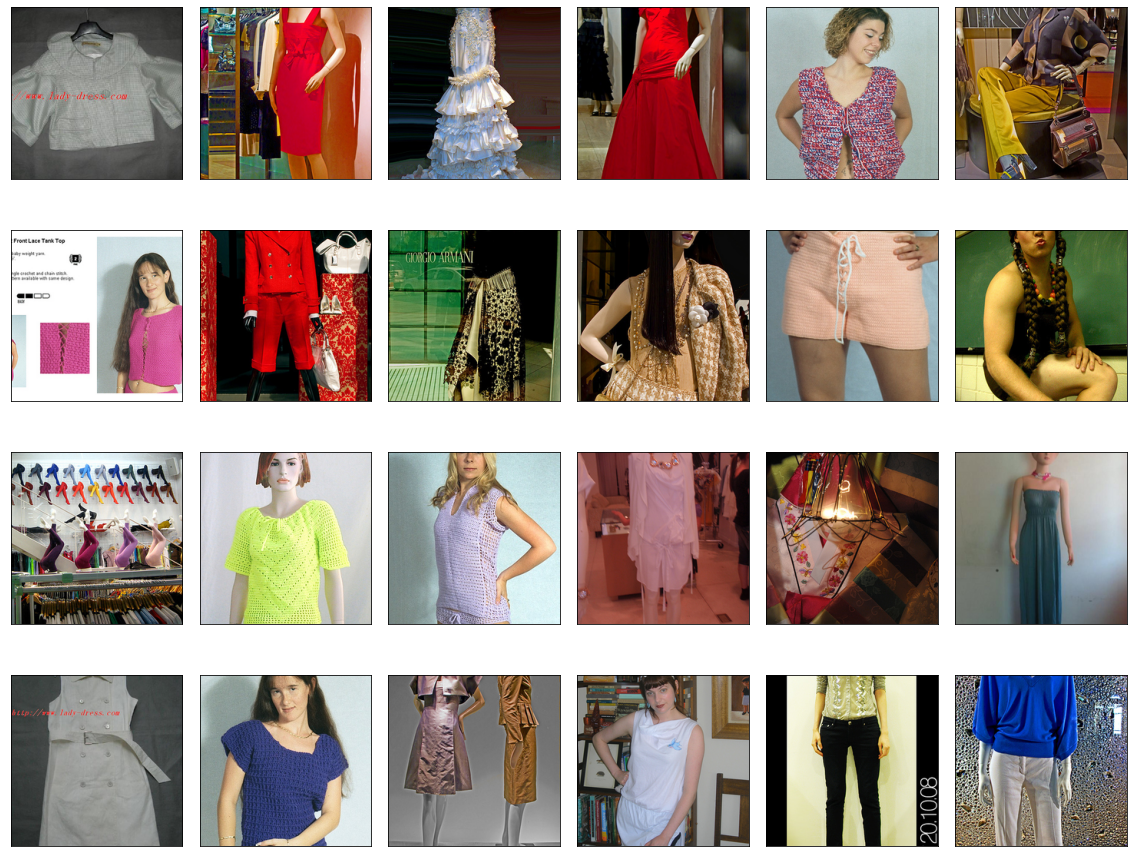

In [63]:
original_photos(woman_resize)          

In [64]:
#create the labels for man and woman 
Y_man = np.zeros(len(X_man))
Y_woman = np.ones(len(X_woman))

print(X_man.shape, Y_man.shape, X_woman.shape, Y_woman.shape) 

# Split training and testing data

In [67]:
#combine men and women data 
X = np.vstack((X_man, X_woman))
Y = np.vstack((Y_man.reshape(-1,1), Y_woman.reshape(-1,1)))
#train test split
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.20, random_state=123)
print(f'There are {len(X_train)} training images, and {len(X_test)} testing images.' )

n_train = len(X_train) 
n_test = len(X_test)

(397, 150528) (397,) (479, 150528) (479,)
There are 700 training images, and 176 testing images.


# SCV Model Training and Evaluation

### Linear SVC, Polynomial SVC, RBF SVC

. Support Vector Machines
Train a support vector classifier using each of the following kernels:
- Linear
- Poly (degree = 2)
- RBF

Report your error rates on the testing dataset for the different kernels.


In [68]:
linear_svc = SVC(kernel='linear')
poly_svc = SVC(kernel='poly', degree=2)
rbf_svc = SVC(kernel='rbf')

In [69]:
linear_svc.fit(X_train, Y_train)
Y_pred_linear = linear_svc.predict(X_test)
target_names = ['men', 'women']

print(metrics.classification_report(Y_test, Y_pred_linear, target_names=target_names))
print('Accuracy:', metrics.accuracy_score(Y_test, Y_pred_linear))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

         men       0.63      0.49      0.55        89
       women       0.58      0.70      0.63        87

    accuracy                           0.60       176
   macro avg       0.60      0.60      0.59       176
weighted avg       0.60      0.60      0.59       176

Accuracy: 0.5965909090909091


In [70]:
poly_svc.fit(X_train, Y_train)
Y_pred_poly = poly_svc.predict(X_test)

print(metrics.classification_report(Y_test, Y_pred_poly, target_names=target_names))
print('Accuracy:', metrics.accuracy_score(Y_test, Y_pred_poly))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

         men       0.83      0.44      0.57        89
       women       0.61      0.91      0.73        87

    accuracy                           0.67       176
   macro avg       0.72      0.67      0.65       176
weighted avg       0.72      0.67      0.65       176

Accuracy: 0.6704545454545454


In [71]:
rbf_svc.fit(X_train, Y_train)
Y_pred_rbf = rbf_svc.predict(X_test)

print(metrics.classification_report(Y_test, Y_pred_rbf, target_names=target_names))
print('Accuracy:', metrics.accuracy_score(Y_test, Y_pred_rbf))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

         men       0.85      0.38      0.53        89
       women       0.60      0.93      0.73        87

    accuracy                           0.65       176
   macro avg       0.72      0.66      0.63       176
weighted avg       0.72      0.65      0.63       176

Accuracy: 0.6534090909090909


# Deep Neural Networks training and evaluation

Using Keras load the VGG16 network. This is the convolutional neural network which won ImageNet 2014, and the accompanying paper is available here, if you want to read more about it. Keras code to perform this step is available here, under the heading "Extract features with VGG16."

Perform transfer learning using VGG16.
- What loss function did you choose, and why?
- What performance do you achieve on your test set and how does this compare to the performance you were originally able to achieve with the linear methods?
- (optional) If you want, you can also perform a "fine-tuning" step. In this step we unfreeze the weights and then perform a few more iterations of gradient descent. This fine tuning can help the network specialize its performance in the particular task that it is needed for. Now, measure the new performance on your test set and compare it to the performance from the previous step.

### What is transfer learning? 

Transfer learning (TL) is a research problem in machine learning (ML) that focuses on storing knowledge gained while solving one problem and applying it to a different but related problem. For example, knowledge gained while learning to recognize cars could apply when trying to recognize trucks.

Steps for transfer learning 

1. Instantiate a base model and load pre-trained weights into it.
2. Freeze all layers in the base model by setting trainable = False.
3. Create a new model on top of the output of one (or several) layers from the base model, so it can adapt to our new dataset.
4. Train your new model on your new dataset.

## VGG

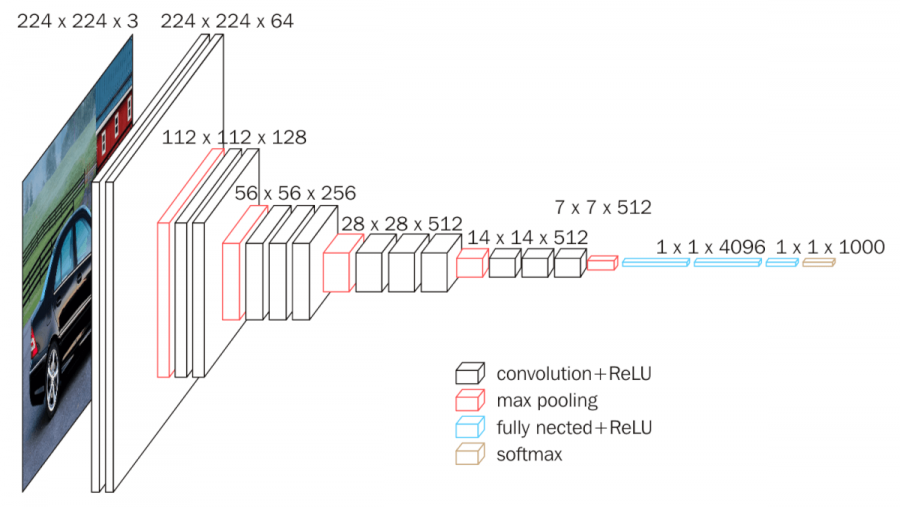

- Input Layer: The input to cov1 layer is of fixed size 224 x 224 RGB image. 

- Pooling Layer: reducing the spatial size of the Convolved Feature

- ImageNet: is a dataset of over 15 million labeled high-resolution images belonging to roughly 22,000 categories

- feature extraction: Run your new dataset through it and record the output of one (or several) layers from the base model.

### Problem of VGG

1. It is painfully slow to train.
2. The network architecture weights themselves are quite large (concerning disk/bandwidth).


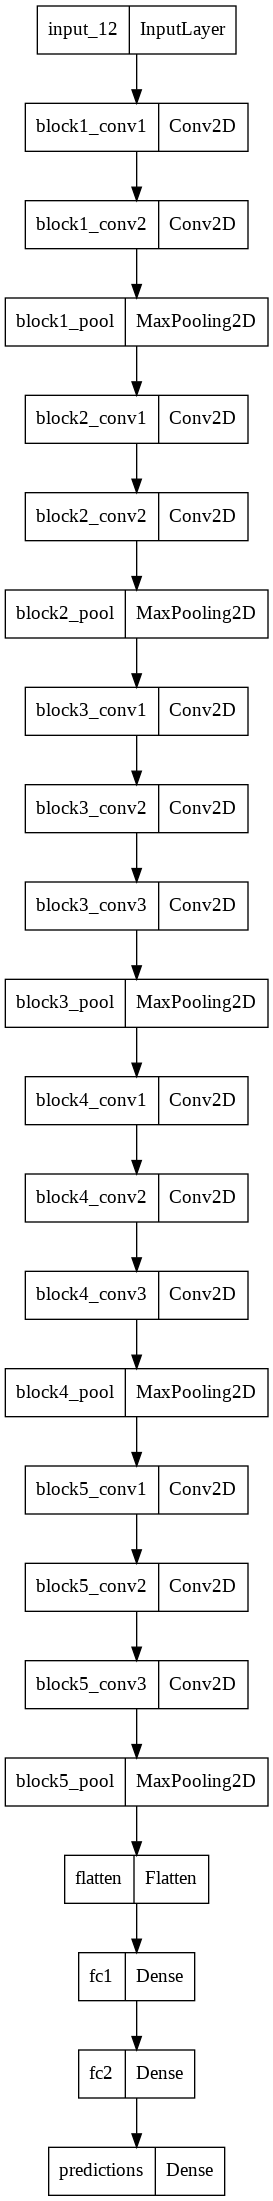

In [72]:
from keras.utils.vis_utils import plot_model
model = VGG16()
plot_model(model, to_file='vgg.png')

### Training the model 

In [73]:
import keras

In [74]:
size = (224, 224)
model = VGG16(weights='imagenet', include_top=False, input_shape=(*size, 3))

inputs = model.input

layers = keras.layers.Flatten()(model.output)

# Add a new network layer, and train this final layer to predict your desired targets.
layers = keras.layers.Dense(1, activation="sigmoid")(layers)

complete_model = keras.models.Model(inputs, layers)

In [75]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [77]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(*size, 3))
# Load weights pre-trained on ImageNet.
# Do not include the ImageNet classifier at the top.

for layer in base_model.layers:
    layer.trainable = False

inputs = base_model.input

# Flatten the output layer to 1 dimension
layers = keras.layers.Flatten()(base_model.output)


# Add a fully connected layer with 512 hidden units and ReLU activation
layers = keras.layers.Dense(512, activation="relu")(layers)

# Add a dropout rate of 0.5 to prevent overfitting 
layers = keras.layers.Dropout(0.2)(layers)

# Add a final sigmoid layer with 1 node for classification output
layers = keras.layers.Dense(1, activation="sigmoid")(layers)

complete_model = keras.models.Model(inputs, layers)

In [80]:
# making only last layer trainable
for layer in complete_model.layers[:len(complete_model.layers)-1]:
    layer.trainable = False
complete_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

model_history = complete_model.fit(X_train.reshape(n_train, 224, 224, 3), Y_train, validation_data = (X_test.reshape(n_test, 224, 224, 3), Y_test), epochs=10)

Epoch 1/10
22/22 [==============================] - 465s 21s/step - loss: 2.8355 - accuracy: 0.6600 - val_loss: 2.9039 - val_accuracy: 0.6818
Epoch 2/10
22/22 [==============================] - 455s 21s/step - loss: 2.3037 - accuracy: 0.6986 - val_loss: 2.9033 - val_accuracy: 0.6648
Epoch 3/10
22/22 [==============================] - 454s 21s/step - loss: 2.1310 - accuracy: 0.7129 - val_loss: 2.8066 - val_accuracy: 0.6705
Epoch 4/10
22/22 [==============================] - 454s 21s/step - loss: 1.6218 - accuracy: 0.7243 - val_loss: 2.5471 - val_accuracy: 0.6761
Epoch 5/10
22/22 [==============================] - 455s 21s/step - loss: 1.5645 - accuracy: 0.7757 - val_loss: 2.4305 - val_accuracy: 0.6705
Epoch 6/10
22/22 [==============================] - 456s 21s/step - loss: 1.4674 - accuracy: 0.7671 - val_loss: 2.5117 - val_accuracy: 0.6818
Epoch 7/10
22/22 [==============================] - 456s 21s/step - loss: 1.4105 - accuracy: 0.7657 - val_loss: 2.2680 - val_accuracy: 0.6648
Epoch 

I only take 500 photos, because processing image photos, training SVC, training VGG model training. Sorry, I'm not doing fine tuning because running VGG takes me CENTURIES (more than an hour). Goodbye. 
👋 

### Explaining the model code

- `layer.trainable = False`: It makes layer's weights from trainable to non-trainable. So the frozen layer won't be updated during the training. This technique is often used in transfer learning, where the base model(trained on some other dataset)is frozen.

- `include_top=False`: The fully-connected output layers of the model used to make predictions is not loaded, allowing a new output layer to be added and trained.

- `X_train.reshape(n_train, 224, 224, 3)`: (numbers of training image, 224, 224, 3). (224, 224, 3) = VGG RGB input size 

- `optimizer="adam"`: Adam is a replacement optimization algorithm for stochastic gradient descent for training deep learning models. 



### Choice of loss functions

We will not choose regression loss functions or mean square error loss, because the output isn't a continuous quantity.

We choose the binary cross-entropy loss function because it's a classification of man and woman photos. 

We want to minimize the score of cross-entropy value(the perfect score is 0). It is calculated through the average difference between the actual and predicted probability distribution. 

It is defined as 


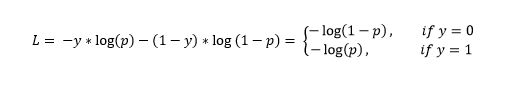

We can use the sigmoid function to calculate the probability p.

We don't select hinge loss because hinge loss tries to maximize the margin between our decision boundary and data points rather than a maximum likelihood estimate of our model’s parameters. Hinge loss is more suitable for SVM, and also the default of SVM loss function in sklearn.

### SVC & Neural Netowrk Model comparisons 

What performance do you achieve on your test set and how does this compare to the performance you were originally able to achieve with the linear methods?

We can observe that deep neural network model is much better than SVM. 

The performance of different models 

| Model      | Accuracy |
| ----------- | ----------- |
| Linear SVM      |   60%   |
| Poly   |     67%    |
| RBF   |     65%    |
| VGG Neural Network   |     80%    |


VGG neural network doesn't have good performance initially, but the accuracy increases with more epochs (the number of passes of the entire training dataset the machine learning algorithm has completed = a forward + a backward pass).

Both neural network and SVM is able to transform data into a high dimensional space. This is what the kernel does for SVMs, and hidden layers do for neural networks. The output layer in the neural network separates the transformed data, which is similar to SVMs. 

The difference between neural network and SVMs is that the decision boundaries for the neural network are arbitrary, but SVMs is based on computing margins. Therefore, the neural network has lower interpretability. 

The neural network performs better in image classification because images are high-dimensional data. SVMs can be biased by the curse of dimensionality, which we create an overfitting model. On the other hand, convolutional neural networks are capable of learning the relevant features from the data, such as the lines, curves, and colors in the images, resulting in better performance. 



Resource
- [Transfer learning & fine-tuning
](https://keras.io/guides/transfer_learning/)

- [VGG Neural Networks: The Next Step After AlexNet
](https://towardsdatascience.com/vgg-neural-networks-the-next-step-after-alexnet-3f91fa9ffe2c#:~:text=VGG%20takes%20in%20a%20224x224,the%20input%20image%20size%20consistent)

- [Top 4 Pre-Trained Models for Image Classification with Python Code
](https://www.analyticsvidhya.com/blog/2020/08/top-4-pre-trained-models-for-image-classification-with-python-code/)

- [How to Choose Loss Functions When Training Deep Learning Neural Networks
](https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/)

- [Dropout layer
](https://keras.io/api/layers/regularization_layers/dropout/)

- [My notes for deep learning session](https://www.notion.so/selflearning/CS156-Session-18-Deep-learning-713ae441d10e4bf28b323127ce26db2f)

- [The Curse of Dimensionality
](https://towardsdatascience.com/the-curse-of-dimensionality-50dc6e49aa1e)

- [SVM Vs Neural Network
](https://www.baeldung.com/cs/svm-vs-neural-network)